<a href="https://colab.research.google.com/github/thinhtaungam/Github_tutorial/blob/master/fuzzy_lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Temperature[0, 1000F]: 57
Cloud Cover[0, 100%]: 35
Nhiệt độ 57 độ F, Tỷ lệ phần trăm mây bao phủ 35; tốc độ là 71 mph



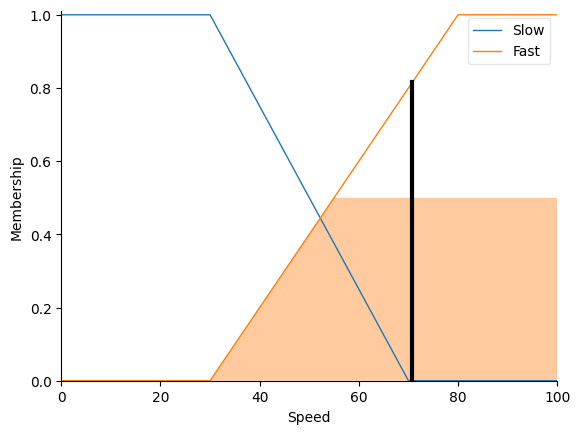

In [ ]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

X = np.arange(0,120,10)
Y = np.arange(0,110,10)
Z = np.arange(0,105,5)

T = ctrl.Antecedent(X,"Temperature")
C = ctrl.Antecedent(Y,"Cloud")
S = ctrl.Consequent(Z,"Speed")

T['Freezing'] = fuzz.trapmf(T.universe,[0,0,30,50])
T['Cool'] = fuzz.trimf(T.universe,[30,50,70])
T['Warm'] = fuzz.trimf(T.universe,[50,70,90])
T['Hot'] = fuzz.trapmf(T.universe,[70,90,110,110])


C['Sunny'] = fuzz.trapmf(C.universe,[0,0,20,40])
C['Cloudy'] = fuzz.trimf(C.universe,[20,50,80])
C['Overcast'] = fuzz.trapmf(C.universe,[60,80,110,110])


S['Slow'] = fuzz.trapmf(S.universe,[0,0,30,70])
S['Fast'] = fuzz.trapmf(S.universe,[30,80,100,100])


R1  = ctrl.Rule( C["Sunny"] & T["Freezing"], S["Slow"])
R2  = ctrl.Rule( C["Sunny"] & T["Cool"], S["Fast"])
R3  = ctrl.Rule( C["Sunny"] & T["Warm"], S["Fast"])
R4  = ctrl.Rule( C["Sunny"] & T["Hot"], S["Fast"])
R5  = ctrl.Rule( C["Cloudy"] & T["Freezing"], S["Slow"])
R6  = ctrl.Rule( C["Cloudy"] & T["Cool"], S["Fast"])
R7  = ctrl.Rule( C["Cloudy"] & T["Warm"], S["Fast"])
R8  = ctrl.Rule( C["Cloudy"] & T["Hot"], S["Fast"])
R9  = ctrl.Rule( C["Overcast"] & T["Freezing"], S["Slow"])
R10 = ctrl.Rule( C["Overcast"] & T["Cool"], S["Slow"])
R11 = ctrl.Rule( C["Overcast"] & T["Warm"], S["Slow"])
R12 = ctrl.Rule( C["Overcast"] & T["Hot"], S["Slow"])

system = ctrl.ControlSystem ([R1, R2, R3, R4, R5, R6, R7, R8, R9, R10, R11, R12])
simulation = ctrl.ControlSystemSimulation( system )
A = float(input("Temperature[0, 1000F]: "))
B = float(input("Cloud Cover[0, 100%]: "))

simulation.input ["Temperature"] = A
simulation.input ["Cloud"] = B

simulation.compute()
print("Nhiệt độ %2.0f độ F, Tỷ lệ phần trăm mây bao phủ %2.0f; tốc độ là %2.0f mph\n" %(A, B, simulation.output["Speed"]))
S.view(simulation)

So diem tai chinh : 5
So diem nhan than : 10
Tai san dam bao :3
Voi nhan than la 10 diem, tai chinh la 5 diem , tai san dam bao la 3 diem vay xep hang tin dung la 7.958333333333333


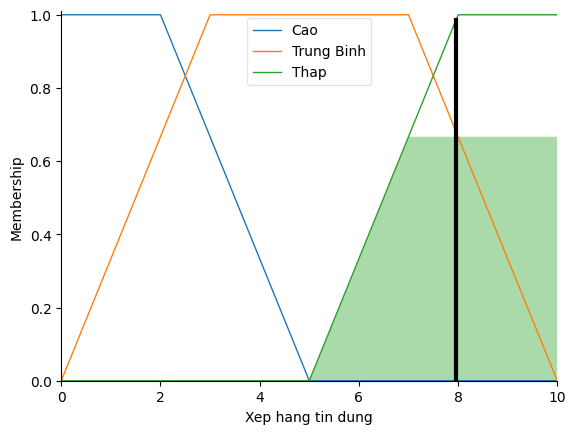

In [ ]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

T = ctrl.Antecedent(np.arange(0,10),'Tai Chinh')
N = ctrl.Antecedent(np.arange(0,10),'Nhan Than')
S = ctrl.Antecedent(np.arange(0,10),'Tai san')
Risk = ctrl.Consequent(np.arange(0,11),'Xep hang tin dung')

T['Yeu'] = fuzz.trapmf(T.universe,[0,0,2,5])
T['Trung Binh'] = fuzz.trapmf(T.universe,[0,3,6,9])
T['Manh'] = fuzz.trapmf(T.universe,[4,7,10,10])


N['Yeu'] = fuzz.trapmf(N.universe,[0,0,2,5])
N['Trung Binh'] = fuzz.trapmf(N.universe,[0,3,6,9])
N['Manh'] = fuzz.trapmf(N.universe,[4,7,10,10])


S['Yeu'] = fuzz.trapmf(S.universe,[0,0,2,5])
S['Trung Binh'] = fuzz.trapmf(S.universe,[0,3,6,9])
S['Manh'] = fuzz.trapmf(S.universe,[4,7,10,10])


Risk['Cao'] = fuzz.trapmf(Risk.universe,[0,0,2,5])
Risk['Trung Binh'] = fuzz.trapmf(Risk.universe,[0,3,7,10])
Risk['Thap'] = fuzz.trapmf(Risk.universe,[5,8,10,10])

R1 = ctrl.Rule(N['Manh']& T['Trung Binh'] & S['Yeu'],Risk['Thap'])
R2 = ctrl.Rule(N['Trung Binh']& T['Trung Binh'] & S['Yeu'],Risk['Trung Binh'])
R3 = ctrl.Rule(N['Yeu']& T['Yeu'] & S['Yeu'],Risk['Cao'])

rules = [R1,R2,R3]
system = ctrl.ControlSystemSimulation(ctrl.ControlSystem(rules))
iT = int(input('So diem tai chinh : '))
iN = int(input('So diem nhan than : '))
iS= int(input('Tai san dam bao :'))

system.input['Tai Chinh']= iT
system.input['Nhan Than']= iN
system.input['Tai san']= iS

system.compute()
oL = system.output['Xep hang tin dung']
Risk.view(system)

print(f"Voi nhan than la {iN} diem, tai chinh la {iT} diem , tai san dam bao la {iS} diem vay xep hang tin dung la {oL}")

Arrival[0, 56]: 2
Queue[0, 32]: 10
Với số phương tiện  2, số phương tiện đèn đỏ 10; thì thời gian là  2 giây



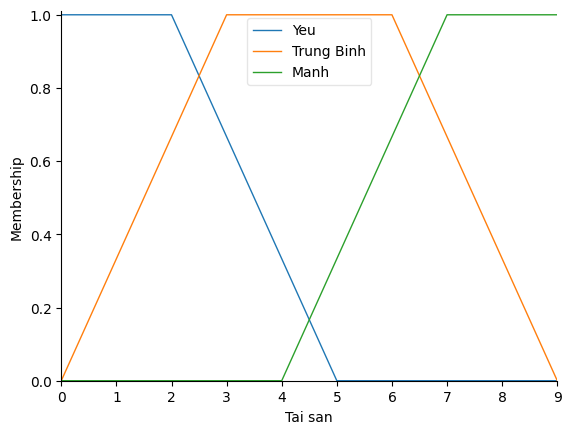

In [ ]:
import numpy as np
import skfuzzy as fz
from skfuzzy import control as ctrl

X = [0, 16, 26, 36, 46, 56]
Y = [10, 8, 14, 20, 26, 32]
Z = np.arange(0, 24, 4)

A = ctrl.Antecedent ( X, "Arrival" )
Q = ctrl.Antecedent ( Y, "Queue")
E = ctrl.Consequent ( Z, "Extension")

A["Rat it"]       = fz.trimf( A.universe, [0, 0, 16] )
A["It"]           = fz.trimf( A.universe, [0, 16, 26] )
A["Binh thuong"]  = fz.trimf( A.universe, [16, 26, 36] )
A["Nhieu"]        = fz.trimf( A.universe, [26, 36, 46] )
A["Rat nhieu"]    = fz.trapmf( A.universe, [36, 46, 56, 56] )


Q["Rat it"]       = fz.trimf( Q.universe, [0,0,8] )
Q["It"]           = fz.trimf( Q.universe, [0,8,14] )
Q["Binh thuong"]  = fz.trimf( Q.universe, [8,14,20] )
Q["Nhieu"]        = fz.trimf( Q.universe, [14,20,26] )
Q["Rat nhieu"]    = fz.trapmf( Q.universe, [20,26,32,32] )


E["Khong keo dai"]  = fz.trimf( E.universe, [0, 0, 4] )
E["Ngan"]           = fz.trimf( E.universe, [0, 4, 8] )
E["Trung binh"]     = fz.trimf( E.universe, [4, 8, 12] )
E["Dai"]            = fz.trimf( E.universe, [8, 12, 16] )
E["Rat dai"]        = fz.trapmf( E.universe, [12, 16, 20, 20])

R1  = ctrl.Rule( Q["Rat it"] & A["Rat it"], E["Khong keo dai"] )
R2  = ctrl.Rule( Q["Rat it"] & A["It"], E["Ngan"] )
R3  = ctrl.Rule( Q["Rat it"] & A["Binh thuong"], E["Trung binh"] )
R4  = ctrl.Rule( Q["Rat it"] & A["Nhieu"], E["Dai"] )
R5  = ctrl.Rule( Q["Rat it"] & A["Rat nhieu"], E["Rat dai"] )
R6  = ctrl.Rule( Q["It"] & A["Rat it"], E["Khong keo dai"] )
R7  = ctrl.Rule( Q["It"] & A["It"], E["Ngan"] )
R8  = ctrl.Rule( Q["It"] & A["Binh thuong"], E["Trung binh"] )
R9  = ctrl.Rule( Q["It"] & A["Nhieu"], E["Dai"] )
R10 = ctrl.Rule( Q["It"] & A["Rat nhieu"], E["Dai"] )
R11 = ctrl.Rule( Q["Binh thuong"] & A["Rat it"], E["Khong keo dai"] )
R12 = ctrl.Rule( Q["Binh thuong"] & A["It"], E["Khong keo dai"] )
R13 = ctrl.Rule( Q["Binh thuong"] & A["Binh thuong"], E["Ngan"] )
R14 = ctrl.Rule( Q["Binh thuong"] & A["Nhieu"], E["Trung binh"] )
R15 = ctrl.Rule( Q["Binh thuong"] & A["Rat nhieu"], E["Dai"] )
R16 = ctrl.Rule( Q["Nhieu"] & A["Rat it"], E ["Khong keo dai"] )
R17 = ctrl.Rule( Q["Nhieu"] & A["It"], E["Khong keo dai"] )
R18 = ctrl.Rule( Q["Nhieu"] & A["Binh thuong"], E["Khong keo dai"] )
R19 = ctrl.Rule( Q["Nhieu"] & A["Nhieu"], E["Ngan"] )
R20 = ctrl.Rule( Q["Nhieu"] & A["Rat nhieu"], E["Trung binh"] )
R21 = ctrl.Rule( Q["Rat nhieu"] & A["Rat it"], E ["Khong keo dai"] )
R22 = ctrl.Rule( Q["Rat nhieu"] & A["It"], E["Khong keo dai"] )
R23 = ctrl.Rule( Q["Rat nhieu"] & A["Binh thuong"], E["Khong keo dai"] )
R24 = ctrl.Rule( Q["Rat nhieu"] & A["Nhieu"], E["Khong keo dai"] )
R25 = ctrl.Rule( Q["Rat nhieu"] & A["Rat nhieu"], E["Ngan"] )

system = ctrl.ControlSystem ([R1, R2, R3, R4, R5, R6, R7, R8, R9, R10, R11, R12, R13, R14, R15, R16, R17, R18, R19, R20, R21, R22, R23, R24, R25])
simulation = ctrl.ControlSystemSimulation( system )

A = float(input("Arrival[0, 56]: "))
B = float(input("Queue[0, 32]: "))

simulation.input["Arrival"] = A
simulation.input["Queue"] = B

simulation.compute()
print("Với số phương tiện %2.0f, số phương tiện đèn đỏ %2.0f; thì thời gian là %2.0f giây\n" %(A, B, simulation.output["Extension"]))
S.view(simulation)
